<a href="https://colab.research.google.com/github/camilaandreasbs/Tareas/blob/main/Copia_de_tarea2_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje de Maquinas
# Informe Tarea 2
## Mayo, 2021
## Integrantes :
Tristán Radic, Benjamín Pizarro , etc...

El objetivo de este Notebook consiste en desarrollar los problemas propuestos correspondientes a la tarea 2 del ramo aprendizaje de maquinas. En la cual estudiaremos el comportamiento de los SVC en distintas situaciones. Para esto utilizaremos el dataset de Breast Cancer originalmente disponible en el repositorio de UC Irving. Utilizaremos tres algoritmos de regresión los que corresponden a Regresión Logit, SVC y LDA, utilizando la librería Sklearn. 

### Sección 1
En esta sección del trabajo realizaremos una descripción y análisis exploratorio de los datos. 

In [ ]:
# Comenzamos importando las librerías que utilizaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



# Importamos el datset

datos = load_breast_cancer()

# Almacenamos los datos, las etiquetas y los nombres de las características

X = np.array(datos.data)
Y = np.array(datos.target)
X_names = datos.feature_names
Y_names = datos.target_names

# Creamos dataframes de pandas para los datos y targets

X_df = pd.DataFrame(X)
print(X_df.head())

Y_df = pd.DataFrame(Y)
print(Y_df.head())

type(Y)

      0      1       2       3   ...      26      27      28       29
0  17.99  10.38  122.80  1001.0  ...  0.7119  0.2654  0.4601  0.11890
1  20.57  17.77  132.90  1326.0  ...  0.2416  0.1860  0.2750  0.08902
2  19.69  21.25  130.00  1203.0  ...  0.4504  0.2430  0.3613  0.08758
3  11.42  20.38   77.58   386.1  ...  0.6869  0.2575  0.6638  0.17300
4  20.29  14.34  135.10  1297.0  ...  0.4000  0.1625  0.2364  0.07678

[5 rows x 30 columns]
   0
0  0
1  0
2  0
3  0
4  0


numpy.ndarray

In [ ]:
print(Y_names)
Y_df.value_counts()

['malignant' 'benign']


1    357
0    212
dtype: int64

### Descripción del dataset
Como podemos observar a continuación, observamos que el dataset contiene 569 filas cada una correspondiente a una muestra de biopsia de tumores de mama, de los cuales 212 corresponden a tumor y el resto (357) a tejido sano. No hay datos perdidos, cada una de las 30 columnas es representada como una variable continuas. 

In [ ]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [ ]:
print(Y_df.info())
Y_df.value_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB
None


<bound method DataFrame.value_counts of      0
0    0
1    0
2    0
3    0
4    0
..  ..
564  0
565  0
566  0
567  0
568  1

[569 rows x 1 columns]>

In [ ]:
# Ahora realizaremos una descripción de los datos
X_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# También describiremos los targets
Y_df.describe()

,0
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### Parte 2
En esta segunda sección, utilizaremos SVC, LDA y Logit para clasificar los tumores como benignos o malignos en base a los descriptores propuestos.
Para comenzar, utilizaremos los parámetros por defecto, dado que los resultados son buenos, no realizamos un ajuste de hiperparámetros. En este caso decidimos escalar los datos con una Normalización... esto se debe a ... 
No se pero parece que aquí primero hagamos una clasificación sin normalización y otra con normalización. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

#Creamos los datasets de testeo y entrenamiento a partir de los datos originales
X_train, X_test, y_train, y_test = train_test_split(X_df, Y, test_size=0.25, random_state=42)

dataset = [X_train, X_test, y_train, y_test]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(426, 30)
(143, 30)
(426,)
(143,)


In [ ]:
# Instanciamos los clasificadores
clf_svm = svm.LinearSVC()
clf_lda = LDA() 
clf_lr = LogisticRegression()

# Crearemos listas donde almacenaremos las prediccionez
pred_svm = []
pred_lda = []
pred_lr = []

# Crearemos listas donde almacenaremos los resultados
score_svm = []
score_lda = []
score_lr = []

# Entrenaremos los modelos y luego los utilizaremos para 
clf_svm.fit( X_train, y_train )
clf_lda.fit( X_train, y_train )
clf_lr.fit( X_train, y_train )

# Ahora predeciremos los resultados a partir del conjunto de testeo.
pred_svm = clf_svm.predict(X_test)
pred_lda = clf_lda.predict(X_test)
pred_lr = clf_lr.predict(X_test)

# Ahora calcularemos los scores de accuracy a partir del conjunto de testeo.
score_svm.append(clf_svm.score(X_test, y_test))
score_lda.append(clf_lda.score(X_test,y_test))
score_lr.append(clf_lr.score(X_test,y_test))

# Imprimos el valor del accuracy para cada uno de los clasificadores
print("Accuracy para cada uno de los clasificadores")
print(score_svm, score_lda, score_lr)

print("")

# Podemos utilizar una el reporte de clasificación de sklearn para reportar los resutlados
print("Reporte de clasificación")
print(classification_report(y_test, pred_svm))
print(classification_report(y_test, pred_lda) )
print(classification_report(y_test, pred_lr))


Accuracy para cada uno de los clasificadores
[0.965034965034965] [0.965034965034965] [0.9790209790209791]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.99      0.96      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       

### Normalización de los datos
Ahora realizaremos una normalización de los datos y observaremos el efecto en los resultados de la clasificaición. Podemos observar que no hay un cambio signifiactivo. Ahora podemos evaluar que pasa si eliminamos columnas. 

In [ ]:
# Normalizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

clf_svm = svm.LinearSVC()
clf_lda = LDA() 
clf_lr = LogisticRegression()

# Crearemos listas donde almacenaremos las prediccionez
pred_svm = []
pred_lda = []
pred_lr = []

# Crearemos listas donde almacenaremos los resultados
score_svm = []
score_lda = []
score_lr = []

# Entrenaremos los modelos y luego los utilizaremos para 
clf_svm.fit( X_train, y_train )
clf_lda.fit( X_train, y_train )
clf_lr.fit( X_train, y_train )

# Ahora predeciremos los resultados a partir del conjunto de testeo.
pred_svm = clf_svm.predict(X_test)
pred_lda = clf_lda.predict(X_test)
pred_lr = clf_lr.predict(X_test)

# Ahora calcularemos los scores de accuracy a partir del conjunto de testeo.
score_svm.append(clf_svm.score(X_test, y_test))
score_lda.append(clf_lda.score(X_test,y_test))
score_lr.append(clf_lr.score(X_test,y_test))

# Imprimos el valor del accuracy para cada uno de los clasificadores
print("Accuracy para cada uno de los clasificadores")
print(score_svm, score_lda, score_lr)

print("")

# Podemos utilizar una el reporte de clasificación de sklearn para reportar los resutlados
print("Reporte de clasificación")
print(classification_report(y_test, pred_svm))
print(classification_report(y_test, pred_lda) )
print(classification_report(y_test, pred_lr))

Accuracy para cada uno de los clasificadores
[0.965034965034965] [0.965034965034965] [0.9790209790209791]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.99      0.96      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       

### Coeficientes


Aquí observamos el valor de cada una de los coeficientes asociada a cada una de las varirables.

In [ ]:
# Ahora podemos obtener los parámetros de cada uno de los modelos
print(clf_svm.get_params)
print("")
print(clf_lda.get_params)
print("")
print(clf_lr.get_params)

print("")
print("Coeficientes LDA")
print(clf_lda.coef_)
print("")
print("Coeficientes Linear SVM")
print(clf_svm.coef_)
print("")
print("Coeficientes Regresión Logística")
print(clf_lr.coef_)


<bound method BaseEstimator.get_params of LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)>

<bound method BaseEstimator.get_params of LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)>

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

Coeficientes LDA
[[ 1.56859097e+01 -2.01202798e-01 -1.49705430e+01 -1.09949834e+00
  -1.70471918e-02  5.04158896e+00 -1.71221738e-02 -4.54214960e+00
   2.136988

### Selección de características
Ahora intentaremos realizar una selección de características para esto podemos utilizar diversas estrategias, dentro de ellas podemos realizar una matriz de correlaciones y eliminar aquellas variables con una correlación alta, pues pueden desestabilizar los modelos. Además realizamos un clustermap para identificar cuales son las variables que son agrupadas por un cluster jerárquico. 

Al realizar el clustering jerárquico sobre la matriz de correlación se puede observar la formación de al menos 10 clusters para los cuales se tienen similares valores de correlacióón . Esto se pued visualizar como los cuadrados a lo largo de la diagonal del mapa de calor. Es decir que podemos intentar quedarnos con 10 del total de las variables y entrenar nuevamente los clasificadores.

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


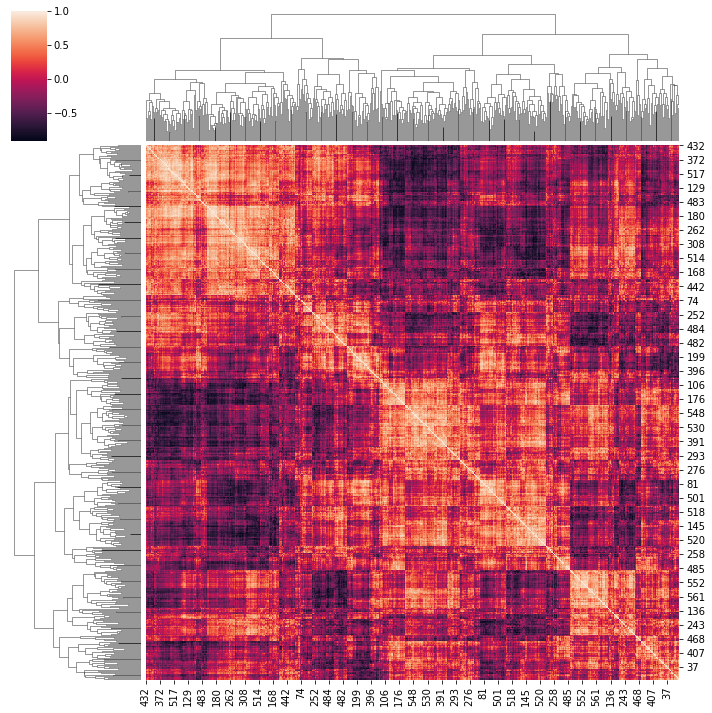

In [ ]:
sns.clustermap(np.corrcoef(X_scaled))

Para continuar, utilizaremos una libreríía que permite realizar selección de características, descartando aquellas variables que superen un determinado número de correlación de pearson.

A grandes rasgos las variables corresponden a datos cuantitativos extraídos del análisis de biopsias de tumores. Dentro de ellas se calculan estadísticos de forma (radio, perimetro, área, concavidad, simetría), así como algunas características de textura de la imágen, tales como la suvidad y la textura promedio. Finalmente está la variable relacionada a la dimensión fractal del tumor. ### Aca hay que meterle chamullo a que corresponde la fractalidad de una imagen o una forma. 

In [ ]:
X_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Nuevo análisis de los clasificadores

Ahora, una vez que hemos estandarizado los datos y eliminado variables redundantes, volveremos a realizar el entrenamiento y clasificación de los datos, para luego evaluar las diferencias. 